# 상장리츠데이터를 활용한 부동산 포트폴리오 배분
- 개요: 마코위츠의 포트폴리오이론을 이용하여 부동산 섹터별 포트폴리오 배분전략을 수립
- 가정: 각 리츠의 퍼포먼스가 각 리츠가 담고있는 자산의 퍼포먼스를 대변한다
- 데이터: 상장리츠 일별 종가중 
  - 너무 최근에 상장된 리츠 제외
  - 퍼포먼스가 타리츠 대비 너무 저조한 리츠 제외

In [1]:
# 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
# 데이터 로드 / 가공
# 출처: 한국공인회계사회
reits_rate = pd.read_excel('reits_rate.xlsx') # 종목 일별수익률
reits_sp = pd.read_excel('reits_sp.xlsx')

In [3]:
reits_rate['일자'] = pd.to_datetime(reits_rate['일자'].apply(lambda x : str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:]))

In [4]:
reits_rate.set_index('일자', inplace = True)

In [5]:
# 종목 일별수익률간 상관관계
reits_rate.corr()

,ESR종목수익률,에너지리츠종목수익률,맵스종목수익률,이지스레지던스종목수익률,NH프라임종목수익률,신한알파종목수익률,이리츠종목수익률,에이리츠종목수익률,KOSPI수익률
ESR종목수익률,1.000000,0.339665,0.373436,0.349494,0.289733,0.180031,0.361342,0.147839,0.280259
에너지리츠종목수익률,0.339665,1.000000,0.406357,0.423205,0.366570,0.254984,0.376975,0.119575,0.286701
맵스종목수익률,0.373436,0.406357,1.000000,0.462016,0.421090,0.293211,0.380020,0.120067,0.295700
이지스레지던스종목수익률,0.349494,0.423205,0.462016,1.000000,0.337269,0.231133,0.472116,0.147062,0.286031
NH프라임종목수익률,0.289733,0.366570,0.421090,0.337269,1.000000,0.232391,0.298002,0.099138,0.201952
신한알파종목수익률,0.180031,0.254984,0.293211,0.231133,0.232391,1.000000,0.311597,0.109959,0.142118
이리츠종목수익률,0.361342,0.376975,0.380020,0.472116,0.298002,0.311597,1.000000,0.164184,0.262554
에이리츠종목수익률,0.147839,0.119575,0.120067,0.147062,0.099138,0.109959,0.164184,1.000000,0.194643
KOSPI수익률,0.280259,0.286701,0.295700,0.286031,0.201952,0.142118,0.262554,0.194643,1.000000


In [18]:
stats = reits_rate.describe().loc[['mean','std']].T.reset_index()
stats

,index,mean,std
0,ESR종목수익률,-0.026044,1.646759
1,에너지리츠종목수익률,0.033015,0.996977
2,맵스종목수익률,-0.062784,0.792120
3,이지스레지던스종목수익률,-0.041423,0.832602
4,NH프라임종목수익률,-0.001038,0.859117
5,신한알파종목수익률,-0.015344,0.903486
6,이리츠종목수익률,-0.008727,0.901094
7,에이리츠종목수익률,-0.067169,2.893525
8,KOSPI수익률,-0.007125,1.057162


In [26]:
plt.rcParams['font.family'] = 'Gulim'

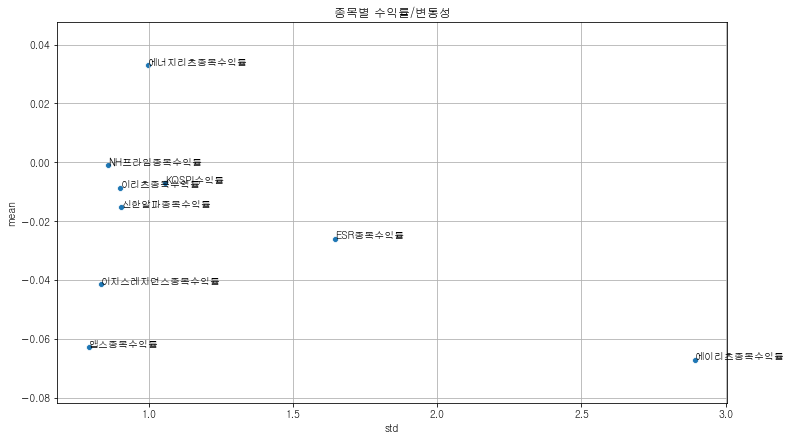

In [31]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = stats, x = 'std', y = 'mean')
for idx, stat in stats.iterrows():
    plt.annotate(s = stat.loc['index'], xy = (stat.loc['std'], stat.loc['mean']), size = 10)

plt.title('종목별 수익률/변동성')
plt.grid()

In [32]:
# altair visualization

# circle = alt.Chart(reits_rate.describe().loc[['mean','std']].T.drop('KOSPI수익률')).mark_circle().encode(
#     x = alt.X('std'),
#     y = alt.Y('mean')
# )

# text = alt.Chart(reits_rate.describe().loc[['mean','std']].T.drop('KOSPI수익률').reset_index()).mark_text(align='left', baseline='line-top').encode(
#     x = 'std',
#     y = 'mean',
#     text = 'index'
    
# )

# (circle + text).properties(width = 600, height = 400)

In [60]:
r2 = reits_rate.drop(['KOSPI수익률','ESR종목수익률','에이리츠종목수익률'], axis = 1)

In [61]:
len(r2.columns)

6

In [62]:
# 포트폴리오 조합을 추출하기 위해 디리클레 분포 무작위 추출

from scipy.stats import dirichlet

X = dirichlet((1,1,1,1,1,1)).rvs(1000, random_state = 42)
X[:3]

array([[0.07758679, 0.49768066, 0.21770513, 0.15094204, 0.02804505,
        0.02804033],
       [0.00772536, 0.25965576, 0.11865618, 0.15895797, 0.00268525,
        0.45231947],
       [0.50534215, 0.06751955, 0.05676773, 0.05731437, 0.10261516,
        0.21044104]])

In [63]:
k = {}
r2.head()

,에너지리츠종목수익률,맵스종목수익률,이지스레지던스종목수익률,NH프라임종목수익률,신한알파종목수익률,이리츠종목수익률
일자,,,,,,
2023-07-13,0.894454,0.946372,1.328021,-0.833333,0.324675,2.805611
2023-07-12,0.179211,0.000000,-0.132626,-0.473934,0.000000,-0.597610
2023-07-11,-0.178891,0.316456,-0.658762,0.836320,-0.162075,-0.198807
2023-07-10,-0.533808,0.317460,-0.262812,-1.063830,0.000000,-0.592885
2023-07-07,-0.354610,-2.777778,-0.131234,-1.052632,-0.803859,-0.978474


In [40]:
# 데이터 가공 및 포트폴리오 조합별 수익률/변동성 추출

In [41]:
reits_sp['일자'] = pd.to_datetime(reits_sp['일자'].apply(lambda x : str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:]))
reits_sp.set_index('일자', inplace = True)

In [66]:
reits_sp.head()

,ESR종목종가,에너지리츠종목종가,맵스종목종가,이지스레지던스종목종가,NH프라임종목종가,신한알파종목종가,이리츠종목종가,에이리츠,KOSPI종가
일자,,,,,,,,,
2023-07-13,3995,5640,3200,3815,4165,6180,5130,3745,2591.23
2023-07-12,3910,5590,3170,3765,4200,6160,4990,3730,2574.72
2023-07-11,3895,5580,3170,3770,4220,6160,5020,3730,2562.49
2023-07-10,3825,5590,3160,3795,4185,6170,5030,3730,2520.70
2023-07-07,3885,5620,3150,3805,4230,6170,5060,3815,2526.71


In [68]:
from tqdm import tqdm

rs2 = reits_sp.drop(['KOSPI종가','ESR종목종가','에이리츠'], axis = 1)
k = {}
for idx, i in tqdm(enumerate(X)):
    _x = (rs2 * i).sum(axis = 1).pct_change(periods = -1).dropna()*100
    k[idx] = {}
    k[idx]['mean'] = _x.mean()
    k[idx]['std'] = _x.std()

1000it [00:08, 118.71it/s]


In [69]:
portfolio = pd.DataFrame(k).T

In [70]:
portfolio.head()

,mean,std
0,-0.037552,0.626577
1,-0.024243,0.670167
2,0.005372,0.713377
3,-0.018076,0.621366
4,-0.023738,0.606242


In [54]:
#시각화

In [72]:
stats

,index,mean,std
0,ESR종목수익률,-0.026044,1.646759
1,에너지리츠종목수익률,0.033015,0.996977
2,맵스종목수익률,-0.062784,0.792120
3,이지스레지던스종목수익률,-0.041423,0.832602
4,NH프라임종목수익률,-0.001038,0.859117
5,신한알파종목수익률,-0.015344,0.903486
6,이리츠종목수익률,-0.008727,0.901094
7,에이리츠종목수익률,-0.067169,2.893525
8,KOSPI수익률,-0.007125,1.057162


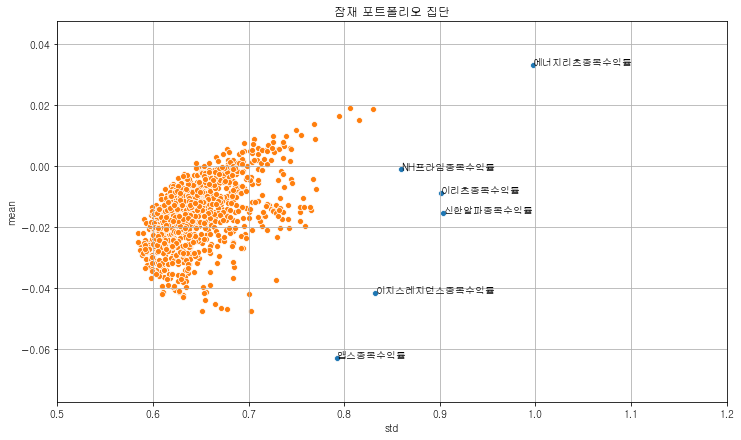

In [77]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = stats.loc[lambda x : ~x['index'].isin(['ESR종목수익률','에이리츠종목수익률','KOSPI수익률'])], x = 'std', y = 'mean')
for idx, stat in stats.loc[lambda x : ~x['index'].isin(['ESR종목수익률','에이리츠종목수익률','KOSPI수익률'])].iterrows():
    plt.annotate(s = stat.loc['index'], xy = (stat.loc['std'], stat.loc['mean']), size = 10)


sns.scatterplot(data = portfolio, x = 'std', y = 'mean')

plt.title('잠재 포트폴리오 집단')

plt.xlim([0.5,1.2])
plt.grid()

In [78]:
# 잠재포트폴리오 집단에서 효율적(우월한) 포트폴리오 추출

In [83]:
ep_list = []
for idx, s in portfolio.iterrows():
    if len(portfolio.loc[lambda x : (x['mean'] > s.loc['mean']) & (x['std'] < s.loc['std']) ]) == 0:
        ep_list.append(idx)


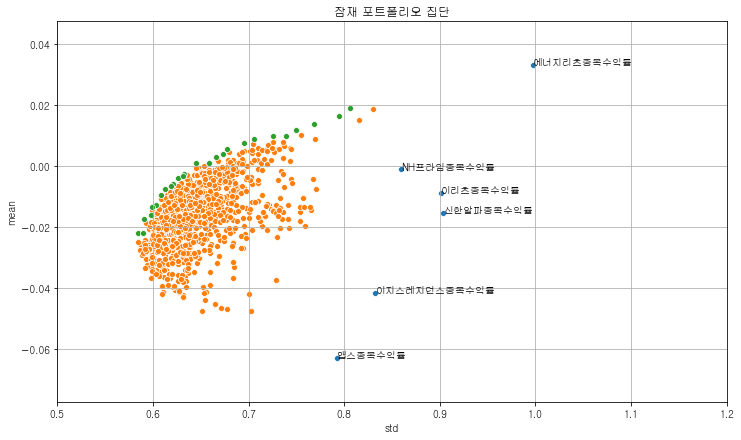

In [97]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = stats.loc[lambda x : ~x['index'].isin(['ESR종목수익률','에이리츠종목수익률','KOSPI수익률'])], x = 'std', y = 'mean')
for idx, stat in stats.loc[lambda x : ~x['index'].isin(['ESR종목수익률','에이리츠종목수익률','KOSPI수익률'])].iterrows():
    plt.annotate(s = stat.loc['index'], xy = (stat.loc['std'], stat.loc['mean']), size = 10)


sns.scatterplot(data = portfolio, x = 'std', y = 'mean')

# 효율적 포트폴리오 표시
sns.scatterplot(data = portfolio.loc[lambda x : x.index.isin(ep_list)], x = 'std', y = 'mean')

plt.title('잠재 포트폴리오 집단')

plt.xlim([0.5,1.2])
plt.grid()

In [106]:
#효율적 포트폴리오 조합 표시
ep_df = pd.DataFrame(X).loc[lambda x : x.index.isin(ep_list)].sort_values(list(range(6)), ascending = [False] * 6)
ep_df.columns = rs2.columns
ep_df

,에너지리츠종목종가,맵스종목종가,이지스레지던스종목종가,NH프라임종목종가,신한알파종목종가,이리츠종목종가
881,0.677207,0.008467,0.016727,0.209644,0.054449,0.033506
516,0.635769,0.018111,0.001408,0.095793,0.016381,0.232539
611,0.620318,0.059457,0.008584,0.202337,0.092031,0.017273
184,0.603201,0.021824,0.057644,0.162201,0.136038,0.019091
654,0.582729,0.003280,0.116214,0.135334,0.146330,0.016113
902,0.486570,0.019352,0.018444,0.178132,0.159128,0.138375
435,0.462437,0.000968,0.071689,0.341571,0.096155,0.027179
34,0.402235,0.003986,0.046154,0.469814,0.002189,0.075623
120,0.392148,0.028144,0.009685,0.190209,0.120261,0.259554
548,0.387431,0.037983,0.011574,0.350356,0.082366,0.130291


# 결론/추후과제
- 각 리츠의 자산 비중을 효율적 포트폴리오 목록에서 도출된 각 리츠별 투자비율로 가중평균하여 부동산 섹터별 포트폴리오 구성에 참고할 수 있다.
- 한계점은 우선 상장리츠의 수가 매우 적고, 각 리츠의 퍼포먼스가 자산 섹터의 퍼포먼스를 대표할 수 있다는 가정이 매우 강력하다고 할 수 있다.
- 추후 자본시장선의 적용 등 더욱 발전된 이론을 적용 할 수 있을 것 같다